# MASCHINELLES LERNEN MIT EMPIRISCHEN DATEN

## Hands-On | Unüberwachtes Lernen

## Vorbereitung

* Verwenden Sie den vorverarbeiteten Titanic-Datensaz aus dem Hand-On "Data Exploration & Preprocessing".
* Gehen Sie die Fragen im Online-Hands-On der Reihe nach durch.
* Beantworten Sie die Fragen, indem Sie die unten vorgesehenen Felder mit Text und Code ergänzen.

## Literatur

* S. Raschka & V. Mirjalili (2018) Datenvorverarbeitung. In: S. Raschka & V. Mirjalili. Machine Learning with Python and Scikit-earn and TensorFlow. S. 125-158 (Kapitel 4)
* A. Famili et al (1997) Data Preprocessing and Intelligent Data Analysis. In: Intelligent Data Analysis Journal

## Aufgabe 1 | Ziele des Clusterings

### 1.1 

Ist die Anzahl der zu identifizierenden Cluster bereits bekannt?

Nein

### 1.2

Nach welchen Kriterien wollen Sie die im Datensatz zu findenden Cluster bewerten? Wählen Sie drei der folgenden Möglichkeiten.

- Minimale Clustergröße
- Durchschnittliche Clustergröße <---
- Maximale Clustergröße
- Durchmesser eines Cluster
- Mittlerer Durchmesser eines Clusters
- Durchschnittlicher Abstand aller Mitglieder eines Clusters zum entsprechenden Clusterzentrum <---
- Abstand zwischen den nächstgelegenen Mitgliedern zweier Cluster
- Abstand zwischen den beiden am weitesten entfernten Mitgliedern zweier Cluster
- Durchschnittlicher Abstand zwischen den Mitgliedern zweier Cluster
- Abstand zwischen den Clusterzentren <---

### 1.3

Haben Sie vor ein Clustervalidierungsindex zu verwenden? Begründen Sie.

- pro: Bewertung und Vergleich der Clustering-Ergebnisse
- contra: Mehraufwand

also nein

## Aufgabe 2 | Überprüfung des Datensatzes

Stellen Sie sicher, dass Ihre Daten zur Anwendung von ML-Verfahren geeignet sind. Ist das aktuell der Fall? Begründen Sie.

In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

train = pd.read_csv("./Titanic/train.csv")
#test = pd.read_csv("./Titanic/test.csv")

#train_label = train['Survived']
train = train.drop('Survived', axis=1)

train = train.drop('Name', axis=1)
#test = test.drop('Name', axis=1)

- Laden der Daten
- bereinigen der "unbekannten" Variable Survive
- bereinigen der Störvariable Name

In [4]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

train = pd.DataFrame(imp.fit_transform(train), columns=train.columns).astype(train.dtypes.to_dict())

#train_imputed = pd.DataFrame(imp.transform(train), columns=train.columns).astype(train.dtypes.to_dict())
#test_imputed = pd.DataFrame(imp.transform(test), columns=test.columns).astype(test.dtypes.to_dict())

#train = pd.DataFrame(train_imputed, columns=train.columns)
#test = pd.DataFrame(test_imputed, columns=test.columns)

- vervollständigen der fehlenden Werte
- beibehalten von Datentypen, Reihenbezeichnung und DataFrame-Format

In [5]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')#, categories=[['Sex','Ticket','Cabin','Embarked']]
#wholeset = train + test
#enc.fit(train)#wholeset

#train = pd.DataFrame(enc.fit(train), columns=train.columns).astype(train.dtypes.to_dict())
temp = train.select_dtypes(include=['object'])

train_encoded = train.select_dtypes(include=['float64','int64']).astype('float64')

enc.fit(temp)
temp = pd.DataFrame(enc.transform(temp).toarray().astype('float'))

train_encoded = pd.concat([train_encoded, temp], axis=1)#.drop('Pclass', axis=1)

#train_encoded.insert(column=temp.column, value=temp.value)
#train_encoded = enc.fit_transform(train.values[:,0].reshape(-1, 1)).toarray()#.astype('float64')

#train_encoded = pd.DataFrame(train_encoded, columns=train.columns)
#test_encoded = pd.DataFrame(enc.transform(test, columns=test.columns)

In [8]:
train.head()

PassengerId  Pclass     Sex   Age  SibSp  Parch            Ticket     Fare  \
0            1       3    male  22.0      1      0         A/5 21171   7.2500   
1            2       1  female  38.0      1      0          PC 17599  71.2833   
2            3       3  female  26.0      0      0  STON/O2. 3101282   7.9250   
3            4       1  female  35.0      1      0            113803  53.1000   
4            5       3    male  35.0      0      0            373450   8.0500   

     Cabin Embarked  
0  B96 B98        S  
1      C85        C  
2  B96 B98        S  
3     C123        S  
4  B96 B98        S

In [9]:
train_encoded.head()

PassengerId  Pclass   Age  SibSp  Parch     Fare    0    1    2    3  ...  \
0          1.0     3.0  22.0    1.0    0.0   7.2500  0.0  1.0  0.0  0.0  ...   
1          2.0     1.0  38.0    1.0    0.0  71.2833  1.0  0.0  0.0  0.0  ...   
2          3.0     3.0  26.0    0.0    0.0   7.9250  1.0  0.0  0.0  0.0  ...   
3          4.0     1.0  35.0    1.0    0.0  53.1000  1.0  0.0  0.0  0.0  ...   
4          5.0     3.0  35.0    0.0    0.0   8.0500  0.0  1.0  0.0  0.0  ...   

   823  824  825  826  827  828  829  830  831  832  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  

[5 rows x 839 columns]

- Encodieren der Strings/Objekte

    - Tickets und Cabin sind sinnlos
        - aber Cabin anders zu codieren in Deck B C etc. könnte hilfreich sein

Ja, Haben numerische Features, nicht-numerische können umgewandelt werden

## Aufgabe 3 | Statistisch motiviertes Clustering

### 3.1

Wenden Sie ein statistisch motiviertes Clustering-Verfahren an, um damit n ∈ {2, ..., 6} Cluster zu identifizieren.

- k-Means
- Hiearchiches Clustering
- DB-SCAN
- Spectral Clustering

In [6]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering
from mpl_toolkits.mplot3d import Axes3D

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

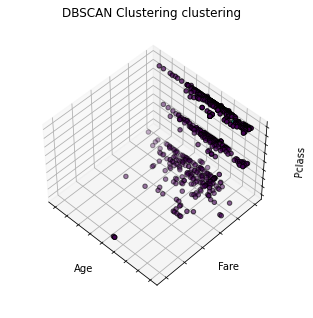

In [7]:
fignum = 0

dcl = DBSCAN(eps=3, min_samples=2).fit(train_encoded)
d_clustering = dcl.labels_

fig = plt.figure(fignum)#, figsize=(4, 3)
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134, auto_add_to_figure=False)
fig.add_axes(ax)

labels = dcl.labels_
ax.scatter(train_encoded['Age'], train_encoded['Fare'], train_encoded['Pclass'], c=labels.astype(float), edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.set_zlabel('Pclass')
ax.set_title('DBSCAN Clustering clustering')
ax.dist = 12
fignum += 1

In [8]:
dcl.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  2, -1,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  3,  3, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  4, -1,  4, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

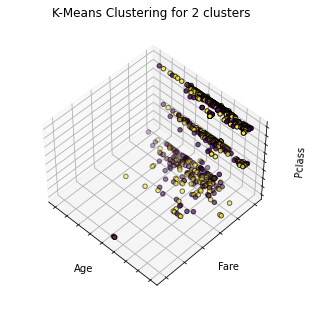

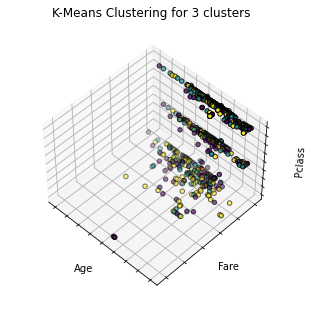

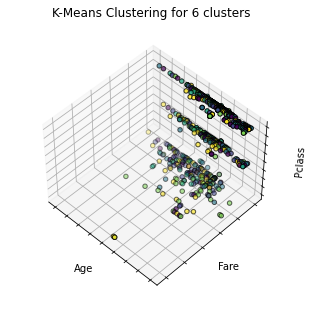

In [8]:
#train_arr = train_encoded
#.toarray()

k_clustering = {}
h_clustering = {}
s_clustering = {}

for n in range(2,7):
    
    kcl = KMeans(n_clusters=n).fit(train_encoded)
    k_clustering[n] = kcl.labels_
    
    fig = plt.figure(fignum)#, figsize=(4, 3)
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134, auto_add_to_figure=False)
    fig.add_axes(ax)
    labels = kcl.labels_
    ax.scatter(train_encoded['Age'], train_encoded['Fare'], train_encoded['Pclass'], c=labels.astype(float), edgecolor='k')
    
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Age')
    ax.set_ylabel('Fare')
    ax.set_zlabel('Pclass')
    ax.set_title('K-Means Clustering for ' + str(n) + ' clusters')
    ax.dist = 12
    fignum += 1

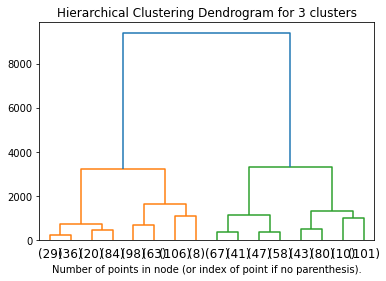

In [9]:
for n in range(2,7):
    
    acl = AgglomerativeClustering(n_clusters=n, compute_distances=True).fit(train_encoded)
    h_clustering[n] = acl.labels_

    if(n == 3):
        # plt.figure(17+n).gca()
        plt.figure(fignum).gca().set_title('Hierarchical Clustering Dendrogram for ' + str(n) + ' clusters')
        # plot the top three levels of the dendrogram
        plot_dendrogram(acl, truncate_mode='level', p=3)#, color_threshold=n
        plt.figure(fignum).gca().set_xlabel("Number of points in node (or index of point if no parenthesis).")
        #plt.figure(fignum++).show()
        fignum +=1

In [12]:
scl = {}
s_clustering = {}
for n in range(2,7):
    
    scl[n] = SpectralClustering(n_clusters=n, assign_labels='discretize').fit(train_encoded)
    s_clustering[n] = scl[n].labels_

    #plt.figure(fignum).gca().set_title('Spectral Clustering Scatterplot for ' + str(n) + ' clusters')
    #plt.figure(fignum).gca().scatter(train_encoded['Age'], train_encoded['Fare'], s=5, c=scl.labels_)
    #fignum +=1

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may n

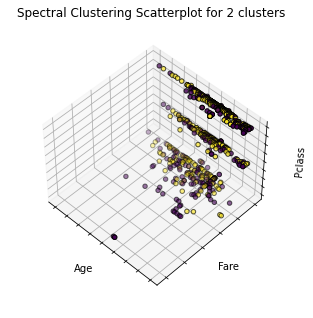

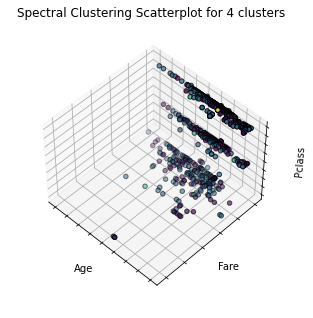

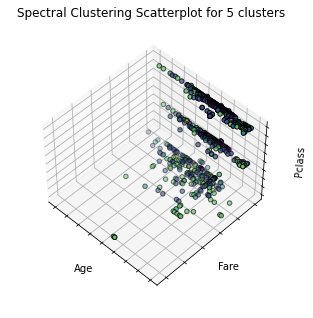

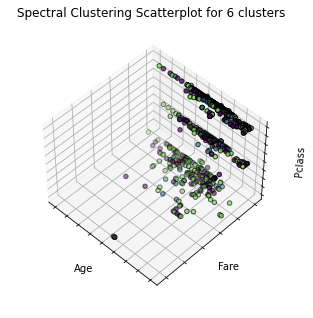

In [14]:
fignum = 0

for n in range(2,7):
    fig = plt.figure(fignum)#, figsize=(4, 3)
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134, auto_add_to_figure=False)
    fig.add_axes(ax)
    labels = scl[n].labels_
    ax.scatter(train_encoded['Age'], train_encoded['Fare'], train_encoded['Pclass'], c=labels.astype(float), edgecolor='k')
    
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Age')
    ax.set_ylabel('Fare')
    ax.set_zlabel('Pclass')
    ax.set_title('Spectral Clustering Scatterplot for ' + str(n) + ' clusters')
    ax.dist = 12
    fignum += 1

#clustering
#clustering.labels_

Hiearchiches Clustering
Default (AgglomerativeClustering): n_clusters=2, *, affinity='euclidean', memory=None, connectivity=None, compute_full_tree='auto', linkage='ward', distance_threshold=None, compute_distances=False

### 3.2

Speichern Sie die gefundenen Clusterzuordnungen in einer csv-Datei ab.

In [12]:
pd.DataFrame(h_clustering).to_csv(r'unsupervised/K_Means_Clustering.csv', index = False)
print(pd.read_csv("./unsupervised/K_Means_Clustering.csv"))

pd.DataFrame(k_clustering).to_csv(r'unsupervised/AgglomerativeClustering.csv', index = False)
print(pd.read_csv("./unsupervised/AgglomerativeClustering.csv"))

pd.DataFrame(d_clustering).to_csv(r'unsupervised/DBSCANClustering.csv', index = False)
print(pd.read_csv("./unsupervised/DBSCANClustering.csv"))

pd.DataFrame(s_clustering).to_csv(r'unsupervised/Spectral_Clustering.csv', index = False)
print(pd.read_csv("./unsupervised/Spectral_Clustering.csv"))

     2  3  4  5  6
0    0  2  2  2  0
1    0  2  2  2  0
2    0  2  2  2  0
3    0  2  2  2  0
4    0  2  2  2  0
..  .. .. .. .. ..
886  1  0  3  3  3
887  1  0  3  3  3
888  1  0  3  3  3
889  1  0  3  3  3
890  1  0  3  3  3

[891 rows x 5 columns]
     2  3  4  5  6
0    1  1  1  0  0
1    1  1  1  0  0
2    1  1  1  0  0
3    1  1  1  0  0
4    1  1  1  0  0
..  .. .. .. .. ..
886  0  0  3  2  2
887  0  0  3  2  2
888  0  0  3  2  2
889  0  0  3  2  2
890  0  0  3  2  2

[891 rows x 5 columns]
     0
0   -1
1   -1
2   -1
3   -1
4   -1
..  ..
886 -1
887 -1
888 -1
889 -1
890 -1

[891 rows x 1 columns]
     2  3  4  5  6
0    0  0  0  4  4
1    0  2  0  4  5
2    0  0  0  4  4
3    0  2  0  4  5
4    0  1  0  0  0
..  .. .. .. .. ..
886  0  0  0  3  4
887  1  0  1  4  5
888  1  0  1  4  5
889  1  0  1  4  5
890  0  1  0  4  3

[891 rows x 5 columns]


Hier kurze Zusammenfassung bzw. Diskussion der Ergebnisse einfügen.

## Aufgabe 4 | Neuro-inspiriertes Clustering

### 4.1

Wenden Sie eine Self Organising Map (SOM) an, um damit n ∈ {2, ..., 6} Cluster zu identifizieren. Verwenden Sie die Standardparameter? Begründen Sie.
Antwort:
- Ja
- Nein

In [10]:
from minisom import MiniSom

# drop class, as it becomes only valuable and thus dominating feature
data = pd.DataFrame(train.drop('Pclass', axis=1)).select_dtypes(include=['float64','int64']).astype('float64')
data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
data = data.values

som = {}
cluster_index = {}

for n in range(2,7):
    
    # Initialization and training
    if(n % 2 == 0):
        som_shape = (2, int(n/2))
    else:
        som_shape = (1, n)
    # 
    som[n-2] = MiniSom(som_shape[0], som_shape[1], data.shape[1], sigma=.85, learning_rate=.25, neighborhood_function='gaussian')#, random_seed=10
    
    # good values:
    # sigma  rate
    # .5      .5
    # .7     1.2
    # .85     .25
    
    som[n-2].train_batch(data, 25000, verbose=True)

    # each neuron represents a cluster
    winner_coordinates = np.array([som[n-2].winner(x) for x in data]).T
    # with np.ravel_multi_index we convert the bidimensional
    # coordinates to a monodimensional index
    cluster_index[n-2] = np.ravel_multi_index(winner_coordinates, som_shape)

 [ 2500 / 2500 ] 100% - 0:00:00 left 
 quantization error: 1.9665076523531952
test
 [ 2500 / 2500 ] 100% - 0:00:00 left 
 quantization error: 1.814824141401087
test
 [ 2500 / 2500 ] 100% - 0:00:00 left 
 quantization error: 1.6934446688384215
test
 [ 2500 / 2500 ] 100% - 0:00:00 left 
 quantization error: 1.6020499066480876
test
 [ 2500 / 2500 ] 100% - 0:00:00 left 
 quantization error: 1.5513683819049555
test


In [26]:
som[20] = MiniSom(som_shape[0], 20, 5, sigma=.85, learning_rate=.25, neighborhood_function='gaussian')#, random_seed=10
som[20].train_batch(data, 25000, verbose=True)
winner_coordinates = np.array([som[20].winner(x) for x in data]).T

In [27]:
cluster_index[20] = np.ravel_multi_index(winner_coordinates, (2, 5))

ValueError: invalid entry in coordinates array

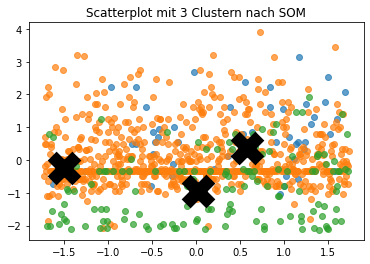

In [22]:
for n in range(2,7):
    
    #fig = plt.figure(fignum)#, figsize=(4, 3)
    #ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134, auto_add_to_figure=False)
    #fig.add_axes(ax)
    
    fignum = n
    
    for c in np.unique(cluster_index[n-2]):
        plt.figure(fignum).gca().scatter(data[cluster_index[n-2] == c, 0], data[cluster_index[n-2] == c, 1], alpha=.7)#label='cluster='+str(c),

    # plotting centroids
    for centroid in som[n-2].get_weights():
        plt.figure(fignum).gca().scatter(centroid[:, 0], centroid[:, 1], marker='x', 
                    s=80, linewidths=35, color='k')#, label='centroid'
        plt.figure(fignum).gca().set_title('Scatterplot mit ' + str(n) + ' Clustern nach SOM')
    #plt.legend();

In [21]:
for c in np.unique(cluster_index[20]):
       plt.figure(fignum).gca().scatter(data[cluster_index[20] == c, 0], data[cluster_index[20] == c, 1], alpha=.7)#label='cluster='+str(c),

# plotting centroids
for centroid in som[20].get_weights():
    plt.figure(fignum).gca().scatter(centroid[:, 0], centroid[:, 1], marker='x', 
                s=80, linewidths=35, color='k')#, label='centroid'
    plt.figure(fignum).gca().set_title('Scatterplot mit ' + str(n) + ' Clustern nach SOM')
#plt.legend();

KeyError: 20

- Standardparameter wären zu bevorzugen für gute Vergleichbarkeit
- jedoch schlechte Documentation und unbekannte Standaardwerte
- trimmen der parameter für bessere classifizierung zu bevorzugen


- drop von p-class vermerken
- initialisierungswerte i.e. sigma, learning rate vermerken für ausarbeitung

### 4.2

Speichern Sie die gefundenen Clusterzuordnungen in einer csv-Datei ab.

In [15]:
pd.DataFrame(cluster_index).to_csv(r'unsupervised/SOMClustering.csv', index = False)
pd.read_csv(r'unsupervised/SOMClustering.csv')

0  1  2  3  4
0    0  1  1  2  0
1    0  1  1  2  0
2    0  1  1  2  0
3    0  1  1  2  0
4    0  1  1  2  0
..  .. .. .. .. ..
886  0  1  0  3  1
887  0  1  0  3  1
888  1  2  3  1  2
889  0  1  0  3  1
890  0  1  0  3  1

[891 rows x 5 columns]

Hier kurze Zusammenfassung bzw. Diskussion der Ergebnisse einfügen.

## Aufgabe 5 | Evaluierung

Wählen Sie aus den in Aufgabe 3 gefundenen Clusterings dasjenige aus, das Ihre Kriterien aus Aufgabe 1.2 am besten erfüllt.
Wie viele Cluster sind optimal? Begründen Sie Ihre Auswahl.
Antwort:
- n ∈ {2, ..., 6}

- 
- 
- 

## Aufgabe 6 | Evaluierung

Wählen Sie aus den in Aufgabe 4 gefundenen Clusterings dasjenige aus, das Ihre Kriterien aus Aufgabe 1.2 am besten erfüllt.
Wie viele Cluster sind optimal? Begründen Sie Ihre Auswahl.

Antwort:
- n ∈ {2, ..., 6}

- mit den entsprechenden Parameternmit den entsprechenden Parametern sind in der Som Clusteranzahlen gut geignet
- es zeichnet sich ein deutlich genaueres Bild bei hoher Anzahl der Cluster
- daher sind wohl 6 Cluster am besten geeignet

## Aufgabe 7 | Vergleich

Vergleichen Sie die in Aufgabe 5 und 6 identifizierten optimalen Clusterings miteiandner. Verwenden Sie dazu die von Ihnen vorab definierten Kriterien.
Welches Verfahren Schneidet besser ab? Welches Clustering ist besser geeignet? Begründen Sie.
Antwort:
- Statistisch motiviertes Clustering
- Neuro-inspiriertes Clustering <---

In [15]:
#from sklearn.metrics import silhouette_score as sh

#agglo_score = 
#som_score = 

Kriterien:

- Minimale Clustergröße
- Maximale Clustergröße
- Abstand zwischen den Clusterzentren

sieht so aus als sei die SOm der klare Sieger

## Dokumentation

Speichern Sie Ihr Juypter-Notebook und laden Sie es im Moodle-Kurs hoch.